static reward

1. big alfa

Episode 100: Average Reward = 157.138
Episode 200: Average Reward = 158.24399999999997
Episode 300: Average Reward = 159.378
Episode 400: Average Reward = 158.82
Episode 500: Average Reward = 157.80100000000002
Episode 600: Average Reward = 156.90699999999998
Episode 700: Average Reward = 159.90499999999997
Episode 800: Average Reward = 157.62499999999997
Episode 900: Average Reward = 159.265
Episode 1000: Average Reward = 156.057
Episode 1100: Average Reward = 159.41799999999998
Episode 1200: Average Reward = 158.08899999999997
Episode 1300: Average Reward = 157.658
Episode 1400: Average Reward = 157.172
Episode 1500: Average Reward = 160.25099999999998
Episode 1600: Average Reward = 158.47399999999996
Episode 1700: Average Reward = 159.707
Episode 1800: Average Reward = 157.33999999999997
Episode 1900: Average Reward = 157.68699999999998
Episode 2000: Average Reward = 158.957
Episode 2100: Average Reward = 157.77100000000002
Episode 2200: Average Reward = 157.97199999999998
Episode 2

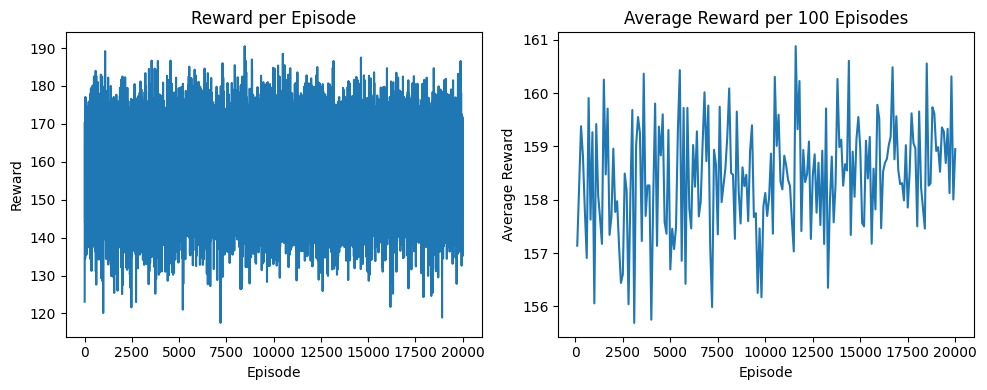

Best Actions for Each State:
low: recharge
intermediate: recharge
high: search


In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define the states and actions
STATES = ['low', 'intermediate', 'high']
ACTIONS = ['search', 'wait', 'recharge']
# Define the rewards for each state-action pair
REWARDS = {
    'high': {'search': 2, 'wait': -1, 'recharge': 0},
    'intermediate': {'search': 0.1, 'wait': 1, 'recharge': -0.5},
    'low': {'search': -2, 'wait': 0, 'recharge': 2}
}

# Initialize the Q-table
Q = np.zeros((len(STATES), len(ACTIONS)))

# Define the hyperparameters
learning_rate = 0.1
discount_factor = 0.9
epsilon = 0.1
num_episodes = 20000

def choose_action(state):
    if np.random.uniform(0, 1) < epsilon:
        # Choose a random action (exploration)
        action = np.random.choice(ACTIONS)  # Include 'recharge' action
    else:
        # Choose the best action based on the Q-values (exploitation)
        state_idx = STATES.index(state)
        q_values = Q[state_idx]
        best_action_idx = np.argmax(q_values)
        action = ACTIONS[best_action_idx]
    return action

def update_q_table(state, action, reward, next_state):
    state_idx = STATES.index(state)
    action_idx = ACTIONS.index(action)
    next_state_idx = STATES.index(next_state)
    
    next_state_q_values = Q[next_state_idx][:len(ACTIONS)]
    max_q_value = np.max(next_state_q_values)
    Q[state_idx, action_idx] = (1 - learning_rate) * Q[state_idx, action_idx] + learning_rate * (reward + discount_factor * max_q_value)


alfa = 0.6
beta = 0.2

def perform_action(state, action):
    reward = REWARDS[state][action]
    if state == 'high':
        rand_val = np.random.uniform(0, 1)
        if action == 'wait':
            next_state = 'high'
        elif action == 'search':
            if 0 < rand_val <= alfa:
                next_state = 'low'
            elif alfa < rand_val <= alfa + beta:
                next_state = 'intermediate'
            else:
                next_state = 'high'
        else:  # action == 'recharge'
            if 0 < rand_val <= alfa:
                next_state = 'high'
            else:
                next_state = 'intermediate'
    elif state == 'intermediate':
        if action == 'wait':
            next_state = 'intermediate'
        elif action == 'search':
            rand_val = np.random.uniform(0, 1)
            if 0 < rand_val <= alfa:
                next_state = 'low'
            elif alfa < rand_val <= alfa + beta:
                next_state = 'intermediate'
            else:
                next_state = 'high'
        else:  # action == 'recharge'
            rand_val = np.random.uniform(0, 1)
            if 0 < rand_val <= alfa:
                next_state = 'low'
            else:
                next_state = 'high'
    else:  # state == 'low'
        if action == 'wait':
            next_state = 'low'
        elif action == 'search':
            rand_val = np.random.uniform(0, 1)
            if 0 < rand_val < alfa:
                next_state = 'low'
            else:
                next_state = 'intermediate'
        else:  # action == 'recharge'
            rand_val = np.random.uniform(0, 1)
            if alfa < beta:
                next_state = 'intermediate'
            else :
                next_state = 'high'

    return reward, next_state

def run_episode():
    rewards = []
    average_rewards = []
    max_steps = 100  # Maximum number of steps per episode
    for episode in range(num_episodes):
        state = 'high'  # Start with the high battery state
        episode_reward = 0

        for step in range(max_steps):
            action = choose_action(state)
            reward, next_state = perform_action(state, action)
            episode_reward += reward
            # print(next_state, action)
            update_q_table(state, action, reward, next_state)

            state = next_state

        rewards.append(episode_reward)

        if (episode + 1) % 100 == 0:
            average_reward = np.mean(rewards[-100:])
            average_rewards.append(average_reward)
            print(f"Episode {episode+1}: Average Reward = {average_reward}")

    return rewards, average_rewards

def print_plot_reward(rewards, average_rewards):
    episodes = np.arange(1, num_episodes + 1)
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(episodes, rewards)
    plt.xlabel('Episode')
    plt.ylabel('Reward')
    plt.title('Reward per Episode')
    average_reward = np.mean(rewards)
    print(f"\nOverall Average Reward = {average_reward}")
    plt.subplot(1, 2, 2)
    plt.plot(np.arange(100, num_episodes + 1, 100), average_rewards)
    plt.xlabel('Episode')
    plt.ylabel('Average Reward')
    plt.title('Average Reward per 100 Episodes')

    plt.tight_layout()
    plt.show()

# Run Q-learning algorithm
rewards, average_rewards = run_episode()
print_plot_reward(rewards, average_rewards)

def analyze_q_table(Q):
    best_actions = {}

    for state_idx, state in enumerate(STATES):
        q_values = Q[state_idx]
        best_action_idx = np.argmax(q_values)
        best_action = ACTIONS[best_action_idx]
        best_actions[state] = best_action

    return best_actions

best_actions = analyze_q_table(Q)
print("Best Actions for Each State:")
for state, action in best_actions.items():
    print(f"{state}: {action}")

2. big beta

Episode 100: Average Reward = 92.31500000000001
Episode 200: Average Reward = 99.21699999999998
Episode 300: Average Reward = 99.24700000000003
Episode 400: Average Reward = 98.46800000000002
Episode 500: Average Reward = 98.44699999999999
Episode 600: Average Reward = 98.278
Episode 700: Average Reward = 98.78900000000002
Episode 800: Average Reward = 98.564
Episode 900: Average Reward = 98.82700000000001
Episode 1000: Average Reward = 99.301
Episode 1100: Average Reward = 98.49399999999997
Episode 1200: Average Reward = 98.69099999999999
Episode 1300: Average Reward = 98.685
Episode 1400: Average Reward = 98.58599999999998
Episode 1500: Average Reward = 98.66
Episode 1600: Average Reward = 98.42300000000003
Episode 1700: Average Reward = 98.795
Episode 1800: Average Reward = 98.647
Episode 1900: Average Reward = 98.82
Episode 2000: Average Reward = 98.70199999999998
Episode 2100: Average Reward = 98.353
Episode 2200: Average Reward = 98.93099999999998
Episode 2300: Average Reward = 9

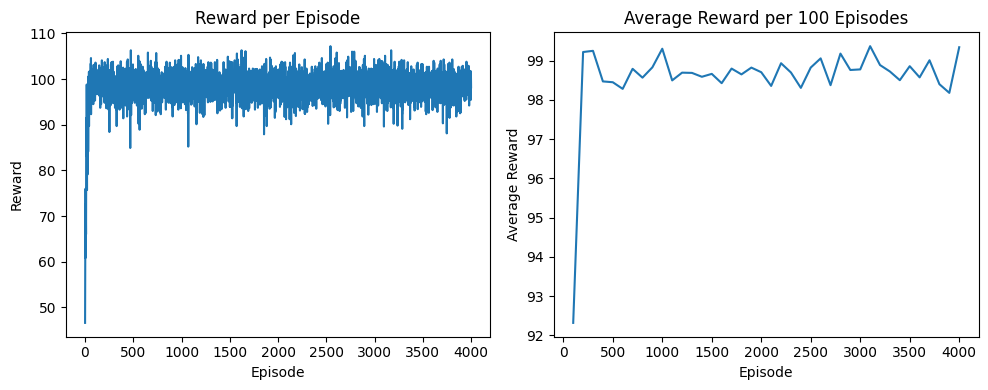

Best Actions for Each State:
low: recharge
intermediate: wait
high: search


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the states and actions
STATES = ['low', 'intermediate', 'high']
ACTIONS = ['search', 'wait', 'recharge']
# Define the rewards for each state-action pair
REWARDS = {
    'high': {'search': 2, 'wait': -1, 'recharge': 0},
    'intermediate': {'search': 0.1, 'wait': 1, 'recharge': -0.5},
    'low': {'search': -2, 'wait': 0, 'recharge': 2}
}

# Initialize the Q-table
Q = np.zeros((len(STATES), len(ACTIONS)))

# Define the hyperparameters
learning_rate = 0.1
discount_factor = 0.9
epsilon = 0.1
num_episodes = 4000

def choose_action(state):
    if np.random.uniform(0, 1) < epsilon:
        # Choose a random action (exploration)
        action = np.random.choice(ACTIONS)  # Include 'recharge' action
    else:
        # Choose the best action based on the Q-values (exploitation)
        state_idx = STATES.index(state)
        q_values = Q[state_idx]
        best_action_idx = np.argmax(q_values)
        action = ACTIONS[best_action_idx]
    return action

def update_q_table(state, action, reward, next_state):
    state_idx = STATES.index(state)
    action_idx = ACTIONS.index(action)
    next_state_idx = STATES.index(next_state)
    
    next_state_q_values = Q[next_state_idx][:len(ACTIONS)]
    max_q_value = np.max(next_state_q_values)
    Q[state_idx, action_idx] = (1 - learning_rate) * Q[state_idx, action_idx] + learning_rate * (reward + discount_factor * max_q_value)


alfa = 0.2
beta = 0.6

def perform_action(state, action):
    reward = REWARDS[state][action]
    if state == 'high':
        rand_val = np.random.uniform(0, 1)
        if action == 'wait':
            next_state = 'high'
        elif action == 'search':
            if 0 < rand_val <= alfa:
                next_state = 'low'
            elif alfa < rand_val <= alfa + beta:
                next_state = 'intermediate'
            else:
                next_state = 'high'
        else:  # action == 'recharge'
            if 0 < rand_val <= alfa:
                next_state = 'high'
            else:
                next_state = 'intermediate'
    elif state == 'intermediate':
        if action == 'wait':
            next_state = 'intermediate'
        elif action == 'search':
            rand_val = np.random.uniform(0, 1)
            if 0 < rand_val <= alfa:
                next_state = 'low'
            elif alfa < rand_val <= alfa + beta:
                next_state = 'intermediate'
            else:
                next_state = 'high'
        else:  # action == 'recharge'
            rand_val = np.random.uniform(0, 1)
            if 0 < rand_val <= alfa:
                next_state = 'low'
            else:
                next_state = 'high'
    else:  # state == 'low'
        if action == 'wait':
            next_state = 'low'
        elif action == 'search':
            rand_val = np.random.uniform(0, 1)
            if 0 < rand_val < alfa:
                next_state = 'low'
            else:
                next_state = 'intermediate'
        else:  # action == 'recharge'
            rand_val = np.random.uniform(0, 1)
            if alfa < beta:
                next_state = 'intermediate'
            else :
                next_state = 'high'

    return reward, next_state

def run_episode():
    rewards = []
    average_rewards = []
    max_steps = 100  # Maximum number of steps per episode
    for episode in range(num_episodes):
        state = 'high'  # Start with the high battery state
        episode_reward = 0

        for step in range(max_steps):
            action = choose_action(state)
            reward, next_state = perform_action(state, action)
            episode_reward += reward
            # print(next_state, action)
            update_q_table(state, action, reward, next_state)

            state = next_state

        rewards.append(episode_reward)

        if (episode + 1) % 100 == 0:
            average_reward = np.mean(rewards[-100:])
            average_rewards.append(average_reward)
            print(f"Episode {episode+1}: Average Reward = {average_reward}")

    return rewards, average_rewards

def print_plot_reward(rewards, average_rewards):
    episodes = np.arange(1, num_episodes + 1)
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(episodes, rewards)
    plt.xlabel('Episode')
    plt.ylabel('Reward')
    plt.title('Reward per Episode')
    average_reward = np.mean(rewards)
    print(f"\nOverall Average Reward = {average_reward}")
    plt.subplot(1, 2, 2)
    plt.plot(np.arange(100, num_episodes + 1, 100), average_rewards)
    plt.xlabel('Episode')
    plt.ylabel('Average Reward')
    plt.title('Average Reward per 100 Episodes')

    plt.tight_layout()
    plt.show()

# Run Q-learning algorithm
rewards, average_rewards = run_episode()
print_plot_reward(rewards, average_rewards)

def analyze_q_table(Q):
    best_actions = {}

    for state_idx, state in enumerate(STATES):
        q_values = Q[state_idx]
        best_action_idx = np.argmax(q_values)
        best_action = ACTIONS[best_action_idx]
        best_actions[state] = best_action

    return best_actions

best_actions = analyze_q_table(Q)
print("Best Actions for Each State:")
for state, action in best_actions.items():
    print(f"{state}: {action}")

3. big gamma

Episode 100: Average Reward = 144.69299999999998
Episode 200: Average Reward = 150.17799999999997
Episode 300: Average Reward = 149.416
Episode 400: Average Reward = 148.332
Episode 500: Average Reward = 150.94999999999996
Episode 600: Average Reward = 150.01699999999997
Episode 700: Average Reward = 151.21599999999995
Episode 800: Average Reward = 151.25899999999996
Episode 900: Average Reward = 149.658
Episode 1000: Average Reward = 149.98799999999997
Episode 1100: Average Reward = 148.33399999999995
Episode 1200: Average Reward = 147.099
Episode 1300: Average Reward = 150.099
Episode 1400: Average Reward = 150.98699999999997
Episode 1500: Average Reward = 151.295
Episode 1600: Average Reward = 152.48399999999998
Episode 1700: Average Reward = 148.03999999999996
Episode 1800: Average Reward = 150.08499999999998
Episode 1900: Average Reward = 149.24699999999996
Episode 2000: Average Reward = 152.45699999999997
Episode 2100: Average Reward = 150.18699999999995
Episode 2200: Average Rew

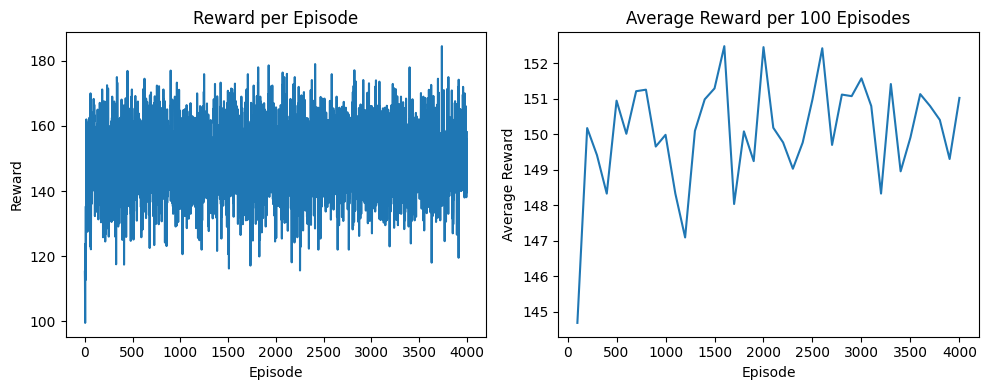

Best Actions for Each State:
low: recharge
intermediate: search
high: search


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the states and actions
STATES = ['low', 'intermediate', 'high']
ACTIONS = ['search', 'wait', 'recharge']
# Define the rewards for each state-action pair
REWARDS = {
    'high': {'search': 2, 'wait': -1, 'recharge': 0},
    'intermediate': {'search': 0.1, 'wait': 1, 'recharge': -0.5},
    'low': {'search': -2, 'wait': 0, 'recharge': 2}
}

# Initialize the Q-table
Q = np.zeros((len(STATES), len(ACTIONS)))

# Define the hyperparameters
learning_rate = 0.1
discount_factor = 0.9
epsilon = 0.1
num_episodes = 4000

def choose_action(state):
    if np.random.uniform(0, 1) < epsilon:
        # Choose a random action (exploration)
        action = np.random.choice(ACTIONS)  # Include 'recharge' action
    else:
        # Choose the best action based on the Q-values (exploitation)
        state_idx = STATES.index(state)
        q_values = Q[state_idx]
        best_action_idx = np.argmax(q_values)
        action = ACTIONS[best_action_idx]
    return action

def update_q_table(state, action, reward, next_state):
    state_idx = STATES.index(state)
    action_idx = ACTIONS.index(action)
    next_state_idx = STATES.index(next_state)
    
    next_state_q_values = Q[next_state_idx][:len(ACTIONS)]
    max_q_value = np.max(next_state_q_values)
    Q[state_idx, action_idx] = (1 - learning_rate) * Q[state_idx, action_idx] + learning_rate * (reward + discount_factor * max_q_value)


alfa = 0.2
beta = 0.2

def perform_action(state, action):
    reward = REWARDS[state][action]
    if state == 'high':
        rand_val = np.random.uniform(0, 1)
        if action == 'wait':
            next_state = 'high'
        elif action == 'search':
            if 0 < rand_val <= alfa:
                next_state = 'low'
            elif alfa < rand_val <= alfa + beta:
                next_state = 'intermediate'
            else:
                next_state = 'high'
        else:  # action == 'recharge'
            if 0 < rand_val <= alfa:
                next_state = 'high'
            else:
                next_state = 'intermediate'
    elif state == 'intermediate':
        if action == 'wait':
            next_state = 'intermediate'
        elif action == 'search':
            rand_val = np.random.uniform(0, 1)
            if 0 < rand_val <= alfa:
                next_state = 'low'
            elif alfa < rand_val <= alfa + beta:
                next_state = 'intermediate'
            else:
                next_state = 'high'
        else:  # action == 'recharge'
            rand_val = np.random.uniform(0, 1)
            if 0 < rand_val <= alfa:
                next_state = 'low'
            else:
                next_state = 'high'
    else:  # state == 'low'
        if action == 'wait':
            next_state = 'low'
        elif action == 'search':
            rand_val = np.random.uniform(0, 1)
            if 0 < rand_val < alfa:
                next_state = 'low'
            else:
                next_state = 'intermediate'
        else:  # action == 'recharge'
            rand_val = np.random.uniform(0, 1)
            if alfa < beta:
                next_state = 'intermediate'
            else :
                next_state = 'high'

    return reward, next_state

def run_episode():
    rewards = []
    average_rewards = []
    max_steps = 100  # Maximum number of steps per episode
    for episode in range(num_episodes):
        state = 'high'  # Start with the high battery state
        episode_reward = 0

        for step in range(max_steps):
            action = choose_action(state)
            reward, next_state = perform_action(state, action)
            episode_reward += reward
            # print(next_state, action)
            update_q_table(state, action, reward, next_state)

            state = next_state

        rewards.append(episode_reward)

        if (episode + 1) % 100 == 0:
            average_reward = np.mean(rewards[-100:])
            average_rewards.append(average_reward)
            print(f"Episode {episode+1}: Average Reward = {average_reward}")

    return rewards, average_rewards

def print_plot_reward(rewards, average_rewards):
    episodes = np.arange(1, num_episodes + 1)
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(episodes, rewards)
    plt.xlabel('Episode')
    plt.ylabel('Reward')
    plt.title('Reward per Episode')
    average_reward = np.mean(rewards)
    print(f"\nOverall Average Reward = {average_reward}")
    plt.subplot(1, 2, 2)
    plt.plot(np.arange(100, num_episodes + 1, 100), average_rewards)
    plt.xlabel('Episode')
    plt.ylabel('Average Reward')
    plt.title('Average Reward per 100 Episodes')

    plt.tight_layout()
    plt.show()

# Run Q-learning algorithm
rewards, average_rewards = run_episode()
print_plot_reward(rewards, average_rewards)

def analyze_q_table(Q):
    best_actions = {}

    for state_idx, state in enumerate(STATES):
        q_values = Q[state_idx]
        best_action_idx = np.argmax(q_values)
        best_action = ACTIONS[best_action_idx]
        best_actions[state] = best_action

    return best_actions

best_actions = analyze_q_table(Q)
print("Best Actions for Each State:")
for state, action in best_actions.items():
    print(f"{state}: {action}")

random reward

1. big alfa

Episode 100: Average Reward = 201.24988909789386
Episode 200: Average Reward = 205.76131843567822
Episode 300: Average Reward = 203.69449160925132
Episode 400: Average Reward = 206.26926491016084
Episode 500: Average Reward = 203.92728908930306
Episode 600: Average Reward = 203.82831439885348
Episode 700: Average Reward = 205.1583838921796
Episode 800: Average Reward = 203.9267804107233
Episode 900: Average Reward = 202.30911667826697
Episode 1000: Average Reward = 203.46357974441696
Episode 1100: Average Reward = 204.1984375108862
Episode 1200: Average Reward = 207.1420614591305
Episode 1300: Average Reward = 202.10175475054473
Episode 1400: Average Reward = 201.70700613779024
Episode 1500: Average Reward = 205.62976264765481
Episode 1600: Average Reward = 204.96644811899188
Episode 1700: Average Reward = 203.05067584168418
Episode 1800: Average Reward = 204.87754569798614
Episode 1900: Average Reward = 204.11663885841637
Episode 2000: Average Reward = 205.48460772242044
Episode 2100:

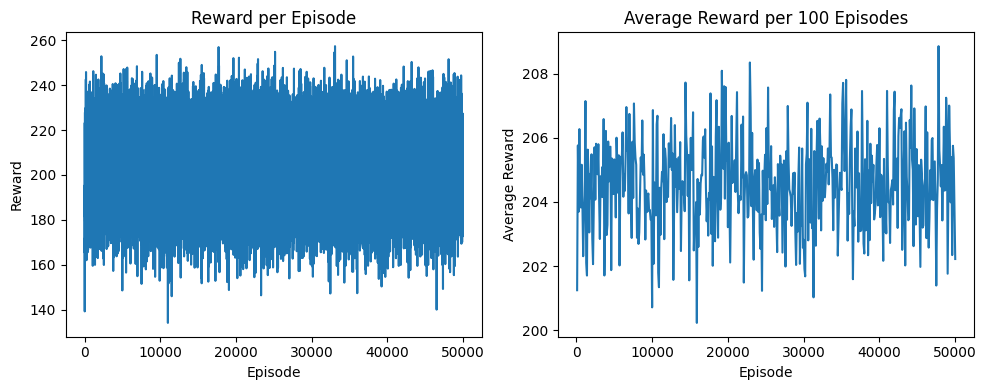

Best Actions for Each State:
low: recharge
intermediate: search
high: search


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the states and actions
STATES = ['low', 'intermediate', 'high']
ACTIONS = ['search', 'wait', 'recharge']

# Define the reward range for each state-action pair
REWARD_RANGE = {
    'high': {'search': (1, 4), 'wait': (-3, 0), 'recharge': (0, 0)},
    'intermediate': {'search': (-0.5, 1.5), 'wait': (0, 3), 'recharge': (-3, -0.5)},
    'low': {'search': (-4, -1), 'wait': (0, 3), 'recharge': (1, 4)}
}

# Initialize the Q-table
Q = np.zeros((len(STATES), len(ACTIONS)))

# Define the hyperparameters
learning_rate = 0.1
discount_factor = 0.9
epsilon = 0.1
num_episodes = 50000

def choose_action(state):
    if np.random.uniform(0, 1) < epsilon:
        # Choose a random action (exploration)
        action = np.random.choice(ACTIONS)  # Include 'recharge' action
    else:
        # Choose the best action based on the Q-values (exploitation)
        state_idx = STATES.index(state)
        q_values = Q[state_idx]
        best_action_idx = np.argmax(q_values)
        action = ACTIONS[best_action_idx]
    return action

def update_q_table(state, action, reward, next_state):
    state_idx = STATES.index(state)
    action_idx = ACTIONS.index(action)
    next_state_idx = STATES.index(next_state)
    
    next_state_q_values = Q[next_state_idx][:len(ACTIONS)]
    max_q_value = np.max(next_state_q_values)
    Q[state_idx, action_idx] = (1 - learning_rate) * Q[state_idx, action_idx] + learning_rate * (reward + discount_factor * max_q_value)

alfa = 0.6
beta = 0.2

def perform_action(state, action):
    reward_range = REWARD_RANGE[state][action]
    reward = np.random.uniform(reward_range[0], reward_range[1])

    if state == 'high':
        rand_val = np.random.uniform(0, 1)
        if action == 'wait':
            next_state = 'high'
        elif action == 'search':
            if 0 < rand_val <= alfa:
                next_state = 'low'
            elif alfa < rand_val <= alfa + beta:
                next_state = 'intermediate'
            else:
                next_state = 'high'
        else:  # action == 'recharge'
            if 0 < rand_val <= alfa:
                next_state = 'high'
            else:
                next_state = 'intermediate'
    elif state == 'intermediate':
        if action == 'wait':
            next_state = 'intermediate'
        elif action == 'search':
            rand_val = np.random.uniform(0, 1)
            if 0 < rand_val <= alfa:
                next_state = 'low'
            elif alfa < rand_val <= alfa + beta:
                next_state = 'intermediate'
            else:
                next_state = 'high'
        else:  # action == 'recharge'
            rand_val = np.random.uniform(0, 1)
            if 0 < rand_val <= alfa:
                next_state = 'low'
            else:
                next_state = 'high'
    else:  # state == 'low'
        if action == 'wait':
            next_state = 'low'
        elif action == 'search':
            rand_val = np.random.uniform(0, 1)
            if 0 < rand_val < alfa:
                next_state = 'low'
            else:
                next_state = 'intermediate'
        else:  # action == 'recharge'
            rand_val = np.random.uniform(0, 1)
            if alfa < beta:
                next_state = 'intermediate'
            else :
                next_state = 'high'

    return reward, next_state


def run_episode():
    rewards = []
    average_rewards = []
    max_steps = 100  # Maximum number of steps per episode
    for episode in range(num_episodes):
        state = 'high'  # Start with the high battery state
        episode_reward = 0

        for step in range(max_steps):
            action = choose_action(state)
            reward, next_state = perform_action(state, action)
            episode_reward += reward
            # print(next_state, action)
            update_q_table(state, action, reward, next_state)

            state = next_state

        rewards.append(episode_reward)

        if (episode + 1) % 100 == 0:
            average_reward = np.mean(rewards[-100:])
            average_rewards.append(average_reward)
            print(f"Episode {episode+1}: Average Reward = {average_reward}")

    return rewards, average_rewards

def print_plot_reward(rewards, average_rewards):
    episodes = np.arange(1, num_episodes + 1)
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(episodes, rewards)
    plt.xlabel('Episode')
    plt.ylabel('Reward')
    plt.title('Reward per Episode')
    average_reward = np.mean(rewards)
    print(f"\nOverall Average Reward = {average_reward}")
    plt.subplot(1, 2, 2)
    plt.plot(np.arange(100, num_episodes + 1, 100), average_rewards)
    plt.xlabel('Episode')
    plt.ylabel('Average Reward')
    plt.title('Average Reward per 100 Episodes')

    plt.tight_layout()
    plt.show()

# Run Q-learning algorithm
rewards, average_rewards = run_episode()
print_plot_reward(rewards, average_rewards)

def analyze_q_table(Q):
    best_actions = {}

    for state_idx, state in enumerate(STATES):
        q_values = Q[state_idx]
        best_action_idx = np.argmax(q_values)
        best_action = ACTIONS[best_action_idx]
        best_actions[state] = best_action

    return best_actions

best_actions = analyze_q_table(Q)
print("Best Actions for Each State:")
for state, action in best_actions.items():
    print(f"{state}: {action}")

2. big beta

Episode 100: Average Reward = 133.48266436426172
Episode 200: Average Reward = 141.1094254235463
Episode 300: Average Reward = 142.08636814058565
Episode 400: Average Reward = 142.95248192621892
Episode 500: Average Reward = 141.3186400345167
Episode 600: Average Reward = 141.05794944893572
Episode 700: Average Reward = 142.76098035496997
Episode 800: Average Reward = 139.54991756694392
Episode 900: Average Reward = 141.62479495294417
Episode 1000: Average Reward = 141.3521713804293
Episode 1100: Average Reward = 141.07401596718296
Episode 1200: Average Reward = 141.5251418495862
Episode 1300: Average Reward = 141.99462071694262
Episode 1400: Average Reward = 141.25178698446484
Episode 1500: Average Reward = 140.8940515244275
Episode 1600: Average Reward = 140.8240198848375
Episode 1700: Average Reward = 141.92929042884055
Episode 1800: Average Reward = 141.30795095225386
Episode 1900: Average Reward = 143.00954743005536
Episode 2000: Average Reward = 140.87682184165033
Episode 2100: A

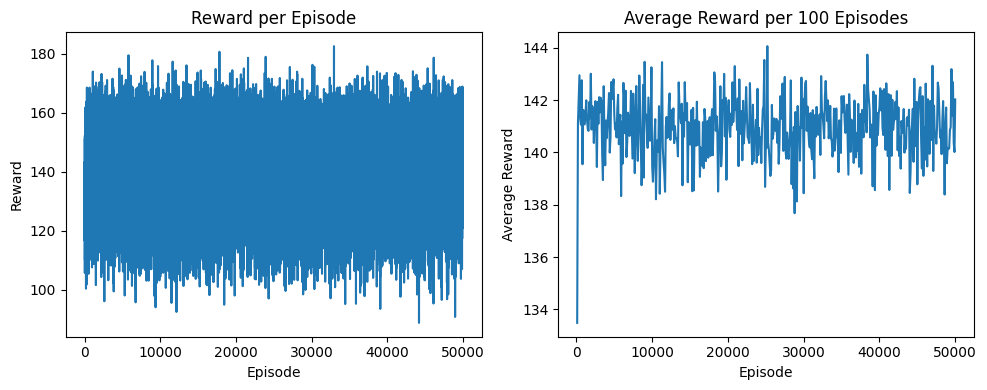

Best Actions for Each State:
low: recharge
intermediate: wait
high: search


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the states and actions
STATES = ['low', 'intermediate', 'high']
ACTIONS = ['search', 'wait', 'recharge']

# Define the reward range for each state-action pair
REWARD_RANGE = {
    'high': {'search': (1, 4), 'wait': (-3, 0), 'recharge': (0, 0)},
    'intermediate': {'search': (-0.5, 1.5), 'wait': (0, 3), 'recharge': (-3, -0.5)},
    'low': {'search': (-4, -1), 'wait': (0, 3), 'recharge': (1, 4)}
}

# Initialize the Q-table
Q = np.zeros((len(STATES), len(ACTIONS)))

# Define the hyperparameters
learning_rate = 0.1
discount_factor = 0.9
epsilon = 0.1
num_episodes = 50000

def choose_action(state):
    if np.random.uniform(0, 1) < epsilon:
        # Choose a random action (exploration)
        action = np.random.choice(ACTIONS)  # Include 'recharge' action
    else:
        # Choose the best action based on the Q-values (exploitation)
        state_idx = STATES.index(state)
        q_values = Q[state_idx]
        best_action_idx = np.argmax(q_values)
        action = ACTIONS[best_action_idx]
    return action

def update_q_table(state, action, reward, next_state):
    state_idx = STATES.index(state)
    action_idx = ACTIONS.index(action)
    next_state_idx = STATES.index(next_state)
    
    next_state_q_values = Q[next_state_idx][:len(ACTIONS)]
    max_q_value = np.max(next_state_q_values)
    Q[state_idx, action_idx] = (1 - learning_rate) * Q[state_idx, action_idx] + learning_rate * (reward + discount_factor * max_q_value)

alfa = 0.2
beta = 0.6

def perform_action(state, action):
    reward_range = REWARD_RANGE[state][action]
    reward = np.random.uniform(reward_range[0], reward_range[1])

    if state == 'high':
        rand_val = np.random.uniform(0, 1)
        if action == 'wait':
            next_state = 'high'
        elif action == 'search':
            if 0 < rand_val <= alfa:
                next_state = 'low'
            elif alfa < rand_val <= alfa + beta:
                next_state = 'intermediate'
            else:
                next_state = 'high'
        else:  # action == 'recharge'
            if 0 < rand_val <= alfa:
                next_state = 'high'
            else:
                next_state = 'intermediate'
    elif state == 'intermediate':
        if action == 'wait':
            next_state = 'intermediate'
        elif action == 'search':
            rand_val = np.random.uniform(0, 1)
            if 0 < rand_val <= alfa:
                next_state = 'low'
            elif alfa < rand_val <= alfa + beta:
                next_state = 'intermediate'
            else:
                next_state = 'high'
        else:  # action == 'recharge'
            rand_val = np.random.uniform(0, 1)
            if 0 < rand_val <= alfa:
                next_state = 'low'
            else:
                next_state = 'high'
    else:  # state == 'low'
        if action == 'wait':
            next_state = 'low'
        elif action == 'search':
            rand_val = np.random.uniform(0, 1)
            if 0 < rand_val < alfa:
                next_state = 'low'
            else:
                next_state = 'intermediate'
        else:  # action == 'recharge'
            rand_val = np.random.uniform(0, 1)
            if alfa < beta:
                next_state = 'intermediate'
            else :
                next_state = 'high'

    return reward, next_state


def run_episode():
    rewards = []
    average_rewards = []
    max_steps = 100  # Maximum number of steps per episode
    for episode in range(num_episodes):
        state = 'high'  # Start with the high battery state
        episode_reward = 0

        for step in range(max_steps):
            action = choose_action(state)
            reward, next_state = perform_action(state, action)
            episode_reward += reward
            # print(next_state, action)
            update_q_table(state, action, reward, next_state)

            state = next_state

        rewards.append(episode_reward)

        if (episode + 1) % 100 == 0:
            average_reward = np.mean(rewards[-100:])
            average_rewards.append(average_reward)
            print(f"Episode {episode+1}: Average Reward = {average_reward}")

    return rewards, average_rewards

def print_plot_reward(rewards, average_rewards):
    episodes = np.arange(1, num_episodes + 1)
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(episodes, rewards)
    plt.xlabel('Episode')
    plt.ylabel('Reward')
    plt.title('Reward per Episode')
    average_reward = np.mean(rewards)
    print(f"\nOverall Average Reward = {average_reward}")
    plt.subplot(1, 2, 2)
    plt.plot(np.arange(100, num_episodes + 1, 100), average_rewards)
    plt.xlabel('Episode')
    plt.ylabel('Average Reward')
    plt.title('Average Reward per 100 Episodes')

    plt.tight_layout()
    plt.show()

# Run Q-learning algorithm
rewards, average_rewards = run_episode()
print_plot_reward(rewards, average_rewards)

def analyze_q_table(Q):
    best_actions = {}

    for state_idx, state in enumerate(STATES):
        q_values = Q[state_idx]
        best_action_idx = np.argmax(q_values)
        best_action = ACTIONS[best_action_idx]
        best_actions[state] = best_action

    return best_actions

best_actions = analyze_q_table(Q)
print("Best Actions for Each State:")
for state, action in best_actions.items():
    print(f"{state}: {action}")

3. big gamma

Episode 100: Average Reward = 194.17772334547897
Episode 200: Average Reward = 197.44829620495113
Episode 300: Average Reward = 192.97221748863322
Episode 400: Average Reward = 196.63951533819505
Episode 500: Average Reward = 195.1965958476323
Episode 600: Average Reward = 194.96645872346073
Episode 700: Average Reward = 194.85608481650092
Episode 800: Average Reward = 195.0379347454839
Episode 900: Average Reward = 195.53417813689796
Episode 1000: Average Reward = 195.35988134011563
Episode 1100: Average Reward = 195.94507524585788
Episode 1200: Average Reward = 196.82757098211746
Episode 1300: Average Reward = 195.74849828695577
Episode 1400: Average Reward = 194.38891081355848
Episode 1500: Average Reward = 194.0671208976342
Episode 1600: Average Reward = 196.89119314079326
Episode 1700: Average Reward = 195.9844048235673
Episode 1800: Average Reward = 193.81294990600395
Episode 1900: Average Reward = 194.4596035269335
Episode 2000: Average Reward = 196.1875835180992
Episode 2100: A

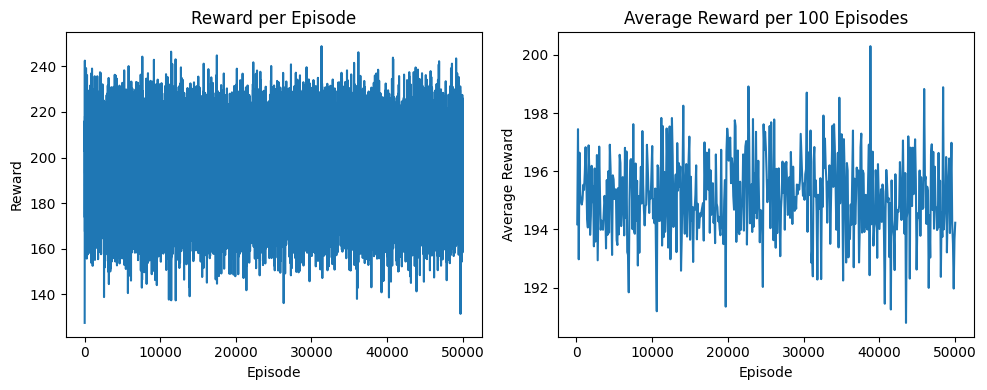

Best Actions for Each State:
low: recharge
intermediate: search
high: search


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the states and actions
STATES = ['low', 'intermediate', 'high']
ACTIONS = ['search', 'wait', 'recharge']

# Define the reward range for each state-action pair
REWARD_RANGE = {
    'high': {'search': (1, 4), 'wait': (-3, 0), 'recharge': (0, 0)},
    'intermediate': {'search': (-0.5, 1.5), 'wait': (0, 3), 'recharge': (-3, -0.5)},
    'low': {'search': (-4, -1), 'wait': (0, 3), 'recharge': (1, 4)}
}

# Initialize the Q-table
Q = np.zeros((len(STATES), len(ACTIONS)))

# Define the hyperparameters
learning_rate = 0.1
discount_factor = 0.9
epsilon = 0.1
num_episodes = 50000

def choose_action(state):
    if np.random.uniform(0, 1) < epsilon:
        # Choose a random action (exploration)
        action = np.random.choice(ACTIONS)  # Include 'recharge' action
    else:
        # Choose the best action based on the Q-values (exploitation)
        state_idx = STATES.index(state)
        q_values = Q[state_idx]
        best_action_idx = np.argmax(q_values)
        action = ACTIONS[best_action_idx]
    return action

def update_q_table(state, action, reward, next_state):
    state_idx = STATES.index(state)
    action_idx = ACTIONS.index(action)
    next_state_idx = STATES.index(next_state)
    
    next_state_q_values = Q[next_state_idx][:len(ACTIONS)]
    max_q_value = np.max(next_state_q_values)
    Q[state_idx, action_idx] = (1 - learning_rate) * Q[state_idx, action_idx] + learning_rate * (reward + discount_factor * max_q_value)

alfa = 0.2
beta = 0.2

def perform_action(state, action):
    reward_range = REWARD_RANGE[state][action]
    reward = np.random.uniform(reward_range[0], reward_range[1])

    if state == 'high':
        rand_val = np.random.uniform(0, 1)
        if action == 'wait':
            next_state = 'high'
        elif action == 'search':
            if 0 < rand_val <= alfa:
                next_state = 'low'
            elif alfa < rand_val <= alfa + beta:
                next_state = 'intermediate'
            else:
                next_state = 'high'
        else:  # action == 'recharge'
            if 0 < rand_val <= alfa:
                next_state = 'high'
            else:
                next_state = 'intermediate'
    elif state == 'intermediate':
        if action == 'wait':
            next_state = 'intermediate'
        elif action == 'search':
            rand_val = np.random.uniform(0, 1)
            if 0 < rand_val <= alfa:
                next_state = 'low'
            elif alfa < rand_val <= alfa + beta:
                next_state = 'intermediate'
            else:
                next_state = 'high'
        else:  # action == 'recharge'
            rand_val = np.random.uniform(0, 1)
            if 0 < rand_val <= alfa:
                next_state = 'low'
            else:
                next_state = 'high'
    else:  # state == 'low'
        if action == 'wait':
            next_state = 'low'
        elif action == 'search':
            rand_val = np.random.uniform(0, 1)
            if 0 < rand_val < alfa:
                next_state = 'low'
            else:
                next_state = 'intermediate'
        else:  # action == 'recharge'
            rand_val = np.random.uniform(0, 1)
            if alfa < beta:
                next_state = 'intermediate'
            else :
                next_state = 'high'

    return reward, next_state


def run_episode():
    rewards = []
    average_rewards = []
    max_steps = 100  # Maximum number of steps per episode
    for episode in range(num_episodes):
        state = 'high'  # Start with the high battery state
        episode_reward = 0

        for step in range(max_steps):
            action = choose_action(state)
            reward, next_state = perform_action(state, action)
            episode_reward += reward
            # print(next_state, action)
            update_q_table(state, action, reward, next_state)

            state = next_state

        rewards.append(episode_reward)

        if (episode + 1) % 100 == 0:
            average_reward = np.mean(rewards[-100:])
            average_rewards.append(average_reward)
            print(f"Episode {episode+1}: Average Reward = {average_reward}")

    return rewards, average_rewards

def print_plot_reward(rewards, average_rewards):
    episodes = np.arange(1, num_episodes + 1)
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    plt.plot(episodes, rewards)
    plt.xlabel('Episode')
    plt.ylabel('Reward')
    plt.title('Reward per Episode')
    average_reward = np.mean(rewards)
    print(f"\nOverall Average Reward = {average_reward}")
    plt.subplot(1, 2, 2)
    plt.plot(np.arange(100, num_episodes + 1, 100), average_rewards)
    plt.xlabel('Episode')
    plt.ylabel('Average Reward')
    plt.title('Average Reward per 100 Episodes')

    plt.tight_layout()
    plt.show()

# Run Q-learning algorithm
rewards, average_rewards = run_episode()
print_plot_reward(rewards, average_rewards)

def analyze_q_table(Q):
    best_actions = {}

    for state_idx, state in enumerate(STATES):
        q_values = Q[state_idx]
        best_action_idx = np.argmax(q_values)
        best_action = ACTIONS[best_action_idx]
        best_actions[state] = best_action

    return best_actions

best_actions = analyze_q_table(Q)
print("Best Actions for Each State:")
for state, action in best_actions.items():
    print(f"{state}: {action}")